In [2]:
print("2.scikit-learn.ipynb")
import numpy as np
import pandas as pd
import sklearn

print(sklearn.__version__)

2.scikit-learn.ipynb
1.0.2


# 1. 사이킷런(scikit-learn)
--------
## 1-1. 사이킷런이란?
> python 기반의 대표적인 머신러닝 라이브러리   

> 머신러닝을 위한 다양한 알고리즘, 프레임워크, API 제공   

> 오랜 기간 실전 환경에서 안정성이 검증되었으며 매우 많은 환경에서 사용하는 성숙한 라이브러리   

---------

## 1-2. 사이킷런의 설계 철학   
 - 일관성:   
   모든 객체가 일관되고 단순한 인터페이스를 공유한다.   

    - 추정기(estimator):   
      데이터셋을 기반으로 일련의 모델 파라미터들을 추정하는 객체를 추정기라고 한다. 추정 자체는 fit() 매서드에 의해 수행되고, 하나의 매개변수로 하나의 데이터셋만 전달한다. (단, 지도학습에서는 레이블 때문에 두개의 파라미터를 받는다.) 추정 과정에서 필요한 다른 매개변수들은 모두 하이퍼파라미터로 간주되고, 인스턴스 변수(객체가 각각 독립적으로 가지고 있는 변수)로 저장된다.   

    - 변환기(transformer):   
      데이터셋을 변환하는 추정기. fit으로 인해 수행된 학스보딘 모델 파라미터를 매개변수로 받아 transform() 메서드를 통해서 변환된 데이터셋을 반환한다. 모든 변환기는 fit()과 transform()을 연달아 호출하는 것과 동일한 fit_transform()메서드도 가지고 있으며, 이따금 fit_transform()이 최적화되어 있어서 각각 호출하는 것보다 더 빠르다.

    - 예측기(predictor):   
      일부 추정기는 주어진 데이터셋에 대해 예측을 만들 수 있다. 예측기의 fit으로 학습된 모델을 이용해 predict()를 통해서 새로운 데이터에 대한 추정값을 계산할 수 있다. 또한 score() 메서드를 사용하여 예측값의 품질을 측정할 수 있다.   
 - 검사가능:   
   모든 추정기의 하이퍼파라미터(ex.imputer.strategry)는 공개(public) 인스턴스 변수로 직접 접근할 수 있고, 모델 파라미터(ex.imputer.statistics_)도 _을 끝에 추가하여 접근이 가능하게 설계되어 검사에 용이하다.   
 - 클래스 남용 방지:   
 데이터 셋을 별도의 클래스가 아닌 넘파이 배열이나 사이파이 희소행렬만 사용하게 하여 클래스가 남용되는 것을 방지한다. 하이퍼파라미터에는 문자열이나 숫자를 사용한다.   
 - 조합성:   
 기존의 구성요소를 최대한 재사용한다. 예를 들어, 여러 변환기를 연결한 다음 추정기를 단 Pipeline 추정기를 쉽게 만들 수 있다.   
 - 합리적인 기본값:   
 사이킷런은 일단 돌아가는 기본 시스템을 빠르게 만들 수 있도록 대부분의 매개변수에 합리적인 기본값이 지정되어있다.

 --------
 ## 1-3. 사이킷런 예제(붓꽃 품종 예측하기 ,분류(classification))

In [9]:
# 붓꽃 데이터셋 가져오기
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris() # 데이터 세트 로딩
iris_data = iris.data # iris.data는 데이터 세트에서 피처 만으로 된 데이터를 numpy로 가지고 있다

iris_label = iris.target # iris.target은 붓꽃 데이터 세트에서 레이블 데이터를 numpy 데이터로 가지고 있다
print('iris target 값: ', iris_label)
print('iris target 명: ', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns = iris.feature_names)
print('iris data column 명:',iris_df.columns)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명:  ['setosa' 'versicolor' 'virginica']
iris data column 명: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
iris_df.info()
# 150개의 데이터 , 4개의 특성 , 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
# 학습용 데이터와 테스트용 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size = 0.2, random_state = 11)
# test_size 전체 데이터 세트 중 테스트 데이터 세트의 비율, random_state = seed

In [16]:
# 결정 트리를 사용한 머신러닝

dt_clf = DecisionTreeClassifier(random_state=11) # 결정트리 객체 생성
dt_clf.fit(X_train, y_train) # 결정트리 훈련 (fit 메서드 사용)
pred = dt_clf.predict(X_test) # 학습이 완료된 결정트리 객체에서 테스트 데이터 세트로 예측 수행 (predict 메서드 사용)

from sklearn.metrics import accuracy_score
print('예측 정확도: {0:0.4f}'. format(accuracy_score(y_test,pred))) # 정확도를 사용해서 모델의 성능 평가

예측 정확도: 0.9333


붓꽃 데이터 세트 분류 예측 프로세스
1. 데이터 세트 분리
2. 모델학습
3. 예측 수행
4. 평가

 --------
 ## 1-4. 사이킷런 기본 프레임워크

 1. estimator의 이해 및 fit() predict() 메서드
 지도학습은 크게 회귀(Regression)과 분류(Classification)로 구분된다. sklearn에서는 분류 알고리즘을 구현한 클래스로  Classifier를, 회귀 알고리즘을 구현한 클래스로 Regressor를 제공한다.그리고 이 두 클래스를 합쳐서 Estimator 클래스 라고 부른다. Estimator 클래스는 지도학습을 위한 클래스이므로, fit(X,y)와 predict() 메서드를 제공한다.   
 
 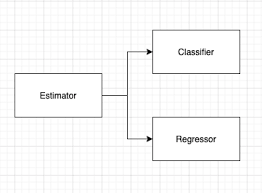
 2. 비지도학습을 위한 클래스와 fit() transform()메서드
 비지도학습인 차원축소, 클러스터링(군집화), 피쳐 추출들을 구현한 클래스도 fit(X)와 transfrom() (그리고 그 둘을 합친 (fit_transform()) 메서드를 제공한다.




3. 사이킷런의 주요 모듈
 - 예제 데이터:
    - skelarn.datasets:   
    사이킷런에 내장되어 예제로 제공하는 데이터 세트
 - 피처 처리:
    - skelarn.preprocessing:   
    데이터 전처리에 필요한 다양한 가공 기능 제공(ex. 문자열을 숫자형 코드 값으로 인코딩, 정규화 스케일링 등)
    - sklearn.feature_selection:   
    알고리즘에 큰 영향을 미치는 피처를 우선순위대로 선택하는 작업을 수행하는 다양한 기능제공(ex. 그룹 내 분산이 가장 작은 피처 삭제)
    - sklearn.feature_extraction:   
    텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨.(ex. 텍스트 데이터에서 Count Vectorizer나 Tf-Idf Vectorizer 등을 생성하는 기능 제공)
 - 피처 처리 & 차원 축소:
    - sklearn.decomposition:   
    차원 축소와 관련된 알고리즘을 지원하는 모듈.(ex. PCA, NMF, Truncated SVD)
 - 데이터 분리, 검증 & 파라미터 튜닝:
    - sklearn.model_selection:   
    교차 검증을 위한 학습용/테스트용 분리, 파라미터 튜닝(ex. Grid search, train_test_split)
 - 평가:
    - sklearn.metrics:   
    분류, 회귀, 클러스터리, 페어와이즈(pairwise)에 대한 다양한 성능측정 방법 제공(ex. Accuracy, Precision, Recall, ROC_AUC, RMSE 등)
 - ML 알고리즘:
     - sklearn.esemble:   
     앙상블 알고리즘 제공(ex. 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등)
     - sklearn.linear_model:   
     선형회귀, 릿지 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘 지원, SGD 관련 알고리즘 지원
     - sklearn.naive_bayes:   
     나이브 베이즈 알고리즘 제공(가우시안 NB, 다항분포 NB 등)
     - sklearn.neighbors:   
     최근접 이웃 알고리즘 제공(K-NN 등)
     - sklearn.svm:
     서포트 벡터 머신 알고리즘 제공
     - sklearn.tree:
     의사 결정 트리 알고리즘 제공
     - sklearn.cluster:   
     비지도 클러스터링 알고리즘 제공(ex. K-Means, 계층형, DBSCAN 등)
 - 유틸리티
    - sklearn.pipeline:   
    피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행 할 수 있는 유틸리티 제공

*일반적으로 머신러닝 모델을 구축하는 주요 프로세스는 피처처리, ML 알고리즘 학습/예측 수행, 그리고 모델 평가의 단계를 반복적으로 수행하는 것이다.

4. 사이킷런의 데이터셋   
사이킷런에는 예제로 활용할 수 있는 간단하면서도 좋은 데이터 세트가 내장되어 있다.
 - 분류:   
 1. datasets.load_breast_cancer() # 위스콘신 유방암 피처들과 악성/음성 데이터 세트
 2. datasets.load_digits() # 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
 3.datasets.load_iris() # 붓꽃에 대한 피처를 가진 데이터 세트

 - 회귀:
 1. datasets.load_boston() # 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
 2. datasets.load_diabetes() # 당뇨 데이터 세트

 - fetch 계열: 데이터의 크기가 커서 인터넷에서 내려받아야하는 데이터   
fetch_covtype()        # 회귀 분석용 토지 조사 자료   
fetch_20newsgroupw()   # 뉴스 그룹 텍스트 자료   
fetch_olivtti_faces()  # 얼굴 이미지 자료   
fetch_lfw_people()     # 얼굴 이미지 자료   
fetch_lfw__pairs()     # 얼굴 이미지 자료   
fetch_rcv()            # 로이터 뉴스 말뭉치   
fetch_mldata()         # ML 웹사이트에서 다운로드   

- 표본 데이터 생성기:   
  1. datasets.make_classifications():   
분류를 위한 데이터 세트 생성기, 특히 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성해 준다.
  2. daasets.make_blobs():   
클러스터링을 위한 데이터 세트 생성기, 군집 지정 개수에 따라 여러가지 클러스터링을 위한 데이터 세트 생성


- 데이터 구성:   
 - data: 피처의 데이터 세트
 - target: 분류시에는 label 값, 회귀일대는 숫자 결과값 데이터 세트
 - target_names: 개별 레이블의 이름
 - feature_names: 피처의 이름
 - DESCR: 데이터 세트에 대한 설명과 각 피처의 설명

In [25]:
# iris 데이터셋 데이터 구성
print('type: ',type(iris)) # Bunch 자료형은 파이썬 딕셔너리 자료형과 유사하다
print('keys: ',iris.keys())

type:  <class 'sklearn.utils.Bunch'>
keys:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [29]:
# iris 데이터셋 데이터 구성
print(iris.data[3]) # iris 3번 데이터

[4.6 3.1 1.5 0.2]


In [31]:
# iris 데이터셋 데이터 구성
print(iris.target[3]) # iris 3번 데이터 레이블

0


In [33]:
# iris 데이터셋 데이터 구성
print(iris.target_names) # iris 레이블 이름

['setosa' 'versicolor' 'virginica']


In [34]:
# iris 데이터셋 데이터 구성
print(iris.feature_names) # iris 피처 이름

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [35]:
# iris 데이터셋 데이터 구성
print(iris.DESCR) # iris 데이터셋 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

 --------
 ## 1-5. 데이터 전처리
실제 모델 구축에 들어가기 전에 아래와 같은 사항에 대해 확인하고 진행하는 것을 권장한다.   

- 범주형, 연속형 데이터 형식의 적절성
- 이상치 및 결측치 처리 여부
- 스케일링 및 분포 변환
- 다중공선성 문제
- 예측변수(y)의 분포 imbalance 문제
- 변수 축소 및 파생 변수 생성

ML 알고리즘은 데이터에 기반하고 있기 때문에 어떤 데이터를 입력으로 가지느냐에 따라 결과도 크게 달라진다(Garbage In, Garbage Out) 
 - 누락된 데이터(결측치) 다루기   [# 결측치 처리 관련 글]( https://junklee.tistory.com/4 )
  1. 누락된 값이 있는 샘플이나 특성 제외


In [62]:
# dropna 사용해서 샘플이나 특성 제외하기
# 결측치용 df 생성
dict_data = {'c0':['a',np.NaN,pd.NaT,None,None],'c1':[4,5,6,None,None],'c2':[7,8,9,None,None],'c3':[10,11,12,np.NaN,np.NaN],'c4':[13,14,15,0,np.NaN]}
df = pd.DataFrame(dict_data)
df

,c0,c1,c2,c3,c4
0,a,4.0,7.0,10.0,13.0
1,NaN,5.0,8.0,11.0,14.0
2,NaT,6.0,9.0,12.0,15.0
3,None,NaN,NaN,NaN,0.0
4,None,NaN,NaN,NaN,NaN


In [44]:
# 결측치 확인 == isnull().sum
# 결측치가 있는 행 제거, dropna()
## axis = 0 -> 샘플제거 , axis = 1 -> 피처 제거
## how = 'all' -> 모든 값이 결측치여야 제거, how = 'any' -> 하나라도 결측치면 제거
## thresh = n -> 결측치가 n개 이상이면 제거
## subset = ['피처명'] 피처명에 결측치가 있는 행만 제거

df.dropna(thresh = 2) # 결측치가 2개 이상 있는 샘플 제거
df.dropna(thresh = 2, axis = 1) # 결측치가 아닌 값이 2개 이상 있는 피처만 남김

,c1,c2,c3,c4
0,4.0,7.0,10.0,13.0
1,5.0,8.0,11.0,14.0
2,6.0,9.0,12.0,15.0
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN


  2. 누락된 값 대치(Imputation)   




In [45]:
#누락된 값 대체
df # 결측치용 데이터셋

,c0,c1,c2,c3,c4
0,a,4.0,7.0,10.0,13.0
1,NaN,5.0,8.0,11.0,14.0
2,NaT,6.0,9.0,12.0,15.0
3,None,NaN,NaN,NaN,0.0
4,None,NaN,NaN,NaN,NaN


In [46]:
# fillna 사용해서 누락된 값 대체
## fillna(0) # 0으로 모든 결측치 대체
## fillna(dict) # 피처와 피처에 따른 대체법 전달 (ex. {'c0':5, 'c1":df['c2'].mean()]})
## fillna(method = 'ffill)) # ffill 앞의 값을 대체 값으로, bfill 뒤의 값을 대체 값으로

df.fillna(method =  'ffill') # 앞의 값으로 결측치 대체

,c0,c1,c2,c3,c4
0,a,4.0,7.0,10.0,13.0
1,a,5.0,8.0,11.0,14.0
2,a,6.0,9.0,12.0,15.0
3,a,6.0,9.0,12.0,0.0
4,a,6.0,9.0,12.0,0.0


In [84]:
# SimpleImputer 사용해서 누락된 값 대치
# SimpleImpiter는 수치형 변수만 대치한다 (strategy constant를 이용하는 경우 dtype이 numerical이 아닌 경우에도 일괄적으로 변환가능)
from sklearn.impute import SimpleImputer
df_drop = df.drop('c0', axis = 1) # 범주형 변수 c0 제거
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean') # 평균값으로 대체, 
# strategy = median(중앙값), most_frequent(최빈값), constant인 경우 fill_value 파라미터를 사용해 값을 정해준다
imputer.fit(df_drop)
df_drop = pd.DataFrame(imputer.transform(df_drop), columns = df_drop.columns, index = df_drop.index) # array로 반환하므로, df으로 돌려주어야한다.
df_drop

,c1,c2,c3,c4
0,4.0,7.0,10.0,13.0
1,5.0,8.0,11.0,14.0
2,6.0,9.0,12.0,15.0
3,5.0,8.0,11.0,0.0
4,5.0,8.0,11.0,10.5


In [ ]:
# sklearn.impute.IterativeImputer: MICE를 이용한 자동 대치, Round robin 방식을 반복하여 결측 값을 회귀하는 방식으로 결측치를 처리한다.

 - 범주형 데이터 다루기 [# 범주형 데이터 인코딩 방식에 관한 글](https://conanmoon.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99-%EC%9C%A0%EB%A7%9D%EC%A3%BC%EC%9D%98-%EB%A7%A4%EC%9D%BC-%EA%B8%80%EC%93%B0%EA%B8%B0-%EC%9D%BC%EA%B3%B1%EB%B2%88%EC%A7%B8-%EC%9D%BC%EC%9A%94%EC%9D%BC-7a40e7de39d4) [# 글2](https://wyatt37.tistory.com/11)
  -  범주형 변수들의 특성 비교:   
   - Nominal: 특정 순서가 없는 형태의 범주형 데이터(ex. red, green, blue)
   - Ordinal: 일부 순서가 있는 형태의 범주형 데이터(ex. Excellent, Okay, Bad)   

- One Hot Encoding
- Label Encoding
- Ordinal Encoding


In [4]:
# 범주형 데이터 인코딩용 데이터셋
data = {
"Temperature": ["Hot", "Cold", "Very Hot", "Warm", "Hot", "Warm", "Warm", "Hot", "Hot", "Cold"],
"Color": ["Red", "Yellow", "Blue", "Blue", "Red", "Yellow", "Red", "Yellow", "Yellow", "Yellow"], 
"Target": [1, 1, 1, 0, 1, 0, 1, 0, 1, 1]}
df = pd.DataFrame(data, columns = ["Temperature", "Color", "Target"])
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


In [88]:
# One-Hot Encoding
## feature 값의 유형에 따라 새로운 feature를 추가해 고유 값에 해당하는 column에만 1을 표시하고 나머지 column에는 0을 표시하는 방식
## 결과값이 희소행렬로 나타난다

# pandas의 get_dummies를 활용하여 One-Hot Encoding
pd.get_dummies(df, prefix = ["Temp"], columns = ['Temperature'])

,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,1,0,0
1,Yellow,1,1,0,0,0
2,Blue,1,0,0,1,0
3,Blue,0,0,0,0,1
4,Red,1,0,1,0,0
5,Yellow,0,0,0,0,1
6,Red,1,0,0,0,1
7,Yellow,0,0,1,0,0
8,Yellow,1,0,1,0,0
9,Yellow,1,1,0,0,0


In [39]:
# sklearn의 OneHotEncoder를 활용하여 One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(df.Temperature.values.reshape(-1,1)).toarray() # 2Darray를 입력으로 바라고 있기 때문에 reshape(-1,1)
# One-Hot Encoding이 희소행렬이므로 scipy.sparse로 압축해서 return하기 때문에 toarray로 ndarray로 바꿔줘야한다
df_OneHot = pd.DataFrame(ohe, columns = ["Temp_" + str(ohc.categories_[0][i]) for i in range (len(ohc.categories_[0]))]) # ndarray to DataFrame, ohc.categories_: 범주

dfh = pd.concat([df,df_OneHot], axis = 1)
dfh

## One-Hot encoding으로 인한 다중공선성 문제(변수간의 상관관계가 높아서 발생하는 문제)를 해결하기 위해서 원-핫 encoding 된 배열에서 feature 열 하나를 삭제한다.
## 삭제해도 잃는 정보는 없지만 어느정도 다중공선성 문제를 완화 시켜준다. --> (get_dummies에서 drop_first = 'True') 

## 트리계열의 알고리즘은 가지를 분기할 때마다 하나의 변수를 선택하여 정보 이득을 계산한다. 
## 하지만 원-핫 인코딩은 하나의 변수를 여러개로 찢는것과 같기 때문에 원-핫 인코딩한 변수가 제외되는 현상이 발생한다.
## --> Binary Encoding, Ordinal Encoding, Hahsing Encoding 사용

,Temperature,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Hot,Red,1,0.0,1.0,0.0,0.0
1,Cold,Yellow,1,1.0,0.0,0.0,0.0
2,Very Hot,Blue,1,0.0,0.0,1.0,0.0
3,Warm,Blue,0,0.0,0.0,0.0,1.0
4,Hot,Red,1,0.0,1.0,0.0,0.0
5,Warm,Yellow,0,0.0,0.0,0.0,1.0
6,Warm,Red,1,0.0,0.0,0.0,1.0
7,Hot,Yellow,0,0.0,1.0,0.0,0.0
8,Hot,Yellow,1,0.0,1.0,0.0,0.0
9,Cold,Yellow,1,1.0,0.0,0.0,0.0


In [128]:
# Label Encoding
## 각 범주가 1에서 N의 숫자를 갖는 인코딩 방식.
## 각 범주 사이의 관계나 순서가 없더라도, 알고리즘은 어느 정도의 관계나 순서가 있는 것으로 인식한다.
## target values 즉 label, y를 인코딩하기 위해서 사용하여야한다. 1D array

# sklearn의 LabelEncoder를 활용하여 Label Encoding
from sklearn.preprocessing import LabelEncoder
df["Temp_label_encoder"] = LabelEncoder().fit_transform(df.Temperature)
# label을 encoding하기 위해 존재하는 encoder이므로 1D array를 넣어주어야 한다
df

,Temperature,Color,Target,Temp_label_encoder
0,Hot,Red,1,1
1,Cold,Yellow,1,0
2,Very Hot,Blue,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,1
5,Warm,Yellow,0,3
6,Warm,Red,1,3
7,Hot,Yellow,0,1
8,Hot,Yellow,1,1
9,Cold,Yellow,1,0


In [131]:
# pandas의 factorize를 활용하여 Label Encoding
df.loc[:, "Temp_factorize_encode"] = pd.factorize(df["Temperature"])[0].reshape(-1,1)
df

## factorize와 LabelEncoder의 숫자 지정 방식이 다르다

,Temperature,Color,Target,Temp_label_encoder,Temp_factorize_encode
0,Hot,Red,1,1,0
1,Cold,Yellow,1,0,1
2,Very Hot,Blue,1,2,2
3,Warm,Blue,0,3,3
4,Hot,Red,1,1,0
5,Warm,Yellow,0,3,3
6,Warm,Red,1,3,3
7,Hot,Yellow,0,1,0
8,Hot,Yellow,1,1,0
9,Cold,Yellow,1,0,1


In [140]:
# df 원상복구
df = df.drop(columns = ['Temp_label_encoder', 'Temp_factorize_encode'],axis = 1)
print()

In [22]:
list(np.array(['Cold','Warm','Hot','Very Hot']).reshape(1,-1))

[array(['Cold', 'Warm', 'Hot', 'Very Hot'], dtype='<U8')]

In [36]:
# Ordinal Encoding
## 각 범주가 1에서 N의 숫자를 갖는 인코딩 방식. (순서 지정 가능)
## 각 범주 사이의 관계나 순서가 없더라도, 알고리즘은 어느 정도의 관계나 순서가 있는 것으로 인식한다.
## featurevalues 즉 label, x를 인코딩하기 위해서 사용하여야한다. 2D array

# sklearn의 OrdinalEncoder를 활용하여 Ordinal Encoding

from sklearn.preprocessing import OrdinalEncoder
ode = OrdinalEncoder(categories = [['Cold','Warm','Hot','Very Hot']]) 
# categories에도 2D array가 들어가야한다 ex. list(np.array(['Cold','Warm','Hot','Very Hot']).reshape(1,-1))
# cold = 0, warm = 1, hot = 2, very hot = 3
df["Temp_Ordinal_encoder"] = ode.fit_transform(df[['Temperature']])
df

,Temperature,Color,Target,Temp_Ordinal_encoder
0,Hot,Red,1,2.0
1,Cold,Yellow,1,0.0
2,Very Hot,Blue,1,3.0
3,Warm,Blue,0,1.0
4,Hot,Red,1,2.0
5,Warm,Yellow,0,1.0
6,Warm,Red,1,1.0
7,Hot,Yellow,0,2.0
8,Hot,Yellow,1,2.0
9,Cold,Yellow,1,0.0


In [37]:
# Mapping을 활용한 Ordinal Encoding
temp_dict = {"Cold": 1, "Warm": 2, "Hot": 3, "Very Hot": 4}
df["Temp_Ordinal_map"] = df.Temperature.map(temp_dict)
df

,Temperature,Color,Target,Temp_Ordinal_encoder,Temp_Ordinal_map
0,Hot,Red,1,2.0,3
1,Cold,Yellow,1,0.0,1
2,Very Hot,Blue,1,3.0,4
3,Warm,Blue,0,1.0,2
4,Hot,Red,1,2.0,3
5,Warm,Yellow,0,1.0,2
6,Warm,Red,1,1.0,2
7,Hot,Yellow,0,2.0,3
8,Hot,Yellow,1,2.0,3
9,Cold,Yellow,1,0.0,1


In [38]:
# df 원상복구
df = df.drop(columns = ['Temp_Ordinal_encoder','Temp_Ordinal_map'],axis = 1)
print()

 - 데이터 스케일링 [# 데이터 스케일링 관련 글](https://dacon.io/codeshare/4526)
  - StandardScaler()    
  $x_i\_new = {x_i -mean(x) \over stdev(x)}$   
  평균이 0이고 분산이 1인 값으로 변환, 이상치에 취약
  - MinMaxScaler()   
  $x_i\_new = {x_i -min(x) \over max(x) - min(x)}$   
  모든 데이터들이 0~1 사이의 데이터값을 갖도록 변환, 이상치에 취약
  - MaxAbsScaler()   
  $x_i\_new = {x_i \over abs(max(x))}$   
  모든 데이터들의 절댓값이 0~1 사이의 값을 갖도록 변환, 이상치에 취약
  - RobustScaler()   
  $x_i\_new = {x_i - x_{med} \over x_{75} - x_{25}}$   
  중앙값과 사분위값을 사용하여 이상치에 robust 하다
  - Normalizer()   
  이전의 scaler가 각 column의 통계치를 이용한다면, Normalizer는 각 row마다 정규화되어 유클리드 거리가 1이 되도록 데이터를 조정한다. 이는 데이터가 Spherical contour(구형 윤곽)을 갖게 만들어 학습이 빨라지고 과대적합 확률을 낮춘다.

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

#유방암 데이터 가져오기
cancer=load_breast_cancer()
cancer = cancer.data

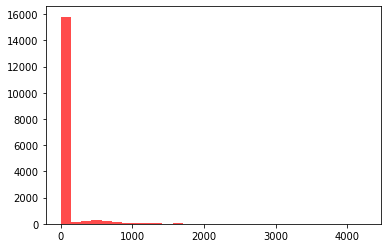

In [57]:
# scale 하기 전 원래 데이터 분포
plt.hist(cancer.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

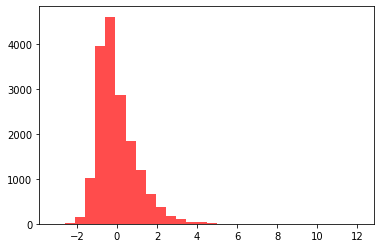

In [58]:
# StandardScaler(), 표준화
## 계별 feature를 평균이 0이고 분산이 1인 값으로 변환 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
cancer_scaled_SS = std.fit_transform(cancer)
plt.hist(cancer_scaled_SS.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

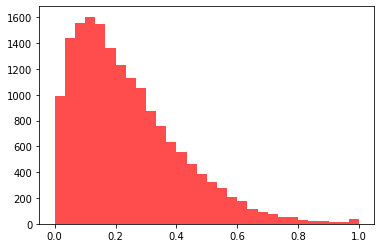

In [59]:
# MinMaxScaler(), MinMax 정규화
## 모든 데이터들이 0~1 사이의 데이터값을 갖도록 변환
from sklearn.preprocessing import MinMaxScaler
std = MinMaxScaler()
cancer_scaled_MM = std.fit_transform(cancer)
plt.hist(cancer_scaled_MM.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

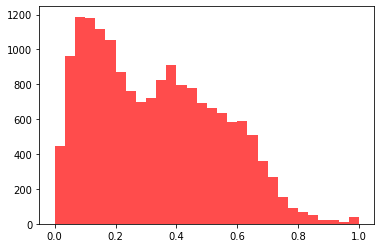

In [61]:
# MinAbsScaler()
## 모든 데이터들의 절댓값이 0~1 사이의 데이터값을 갖도록 변환, MinMaxScaler보다 데이터가 더 넓게 분포
from sklearn.preprocessing import MaxAbsScaler
std = MaxAbsScaler()
cancer_scaled_MA = std.fit_transform(cancer)
plt.hist(cancer_scaled_MA.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

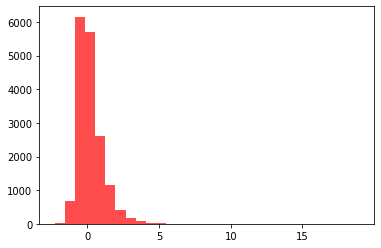

In [62]:
# RobustScaler()
## 중앙값(median)과 사분위값(quartile)을 사용하여 이상치의 영향 최소화, standardScaler보다 데이터가 더 넓게 분포
from sklearn.preprocessing import RobustScaler
std = RobustScaler()
cancer_scaled_RS = std.fit_transform(cancer)
plt.hist(cancer_scaled_RS.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

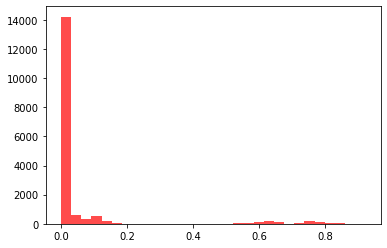

In [63]:
# Normalizer()
## 행(row)마다 정규화, 모든 feature 사이의 유클리드 거리가 1이 되도록 만들어줌
from sklearn.preprocessing import Normalizer
std = Normalizer()
cancer_scaled_N = std.fit_transform(cancer)
plt.hist(cancer_scaled_N.reshape(-1,1), color = 'red',bins = 30, alpha = 0.7)
plt.show()

 --------
 ## 1-6. Model Selection / 검증(validation)
  - 학습 데이터 세트 분리   
    - train_test_split()


In [64]:
# 와인 데이터셋 다운로드
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)

In [74]:
df.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash','Magnesium', 'Total phenols','Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print(np.unique(df['Class label'])) # 클래스 레이블, y
df.head()

[1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [88]:
from sklearn.model_selection import train_test_split
X,y = df.iloc[:,1:].values, df.iloc[:,0].values
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, shuffle =True ,random_state = 0, stratify = y)
## test size: 테스트 샘플의 비율, shuffle: 나누기 전에 섞음, stratify: 층화 추출, 훈련 세트와 테스트 세트에 있는 클래스 비율이 원본 데이터셋과 동일하게 유지

# 모델 훈련 및 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print("예측 정확도 {0:0.4f}".format(accuracy_score(y_test,pred)))


예측 정확도 0.9074


  - 검증(validation)   
  test 세트로 모델을 검증하면 test 세트에 모델이 과대적합되는 문제가 발생한다. 하이퍼파라미터 튜닝 및 중간 성능 점검을 위해서는 훈련세트에서 validation set를 따로 떼어 검증 세트로 사용한다.
  - 교차검증(cross validation) [# cross validation 관련 글](https://heytech.tistory.com/113) [# 관련 글 2](https://m.blog.naver.com/santalsm/220859539666)   
  단일 검증 세트(hold-out cross- validation) 또한 과적합의 위험이 있고, 검증세트를 따로 떼어놓으면 작은 데이터셋에서는 훈련세트가 작아져 과소적합의 위험성이 있다. 그래서 훈련때마다 검증 세트를 바꾸는 교차 검증을 사용한다.
    - 장점:   
    모든 데이터셋을 훈련에 활용할 수 있다   
    정확도를 향상시킬 수 있다   
    데이터 부족으로 인한 과소적합을 방지할 수 있다   
    평가에 사용되는 데이터 편중을 막을 수 있다   
    평가 결과에 다라 좀 더 일반화된 모델을 막을 수 있다
    - 단점:   
    Iteration 횟수가 많기 때문에, 모델 훈련/평가 시간이 오래 걸린다.

    - k - fold 교차검증(),(sklearn.model_selection.KFold)   
    전체 데이터셋을 K개의 fold로 나누어 K번 다른 fold 1개를 validation data로 나머지 (k-1)개를 train data로 분할하는 과정을 반복함으로써 train 및 validation data를 교차 변경하는 방법론   
    - strified k - fold 교차검증,(sklearn.model_selection.StratifiedKFold)  
    불균형한(imbalanced) 분포도를 가진 레이블 데이터 집합을 위한 K fold 방식, K fold가 원본 데이터 집합의 레이블 분포를 고려하여 이 분포와 동일하게 학습과 검증 데이터를 생성하여 K fold 교차검증을 수행
    - Leave-p-Out Cross-Validation(LpOCV), (sklearn.model_selection.LeavePOut)   
    전체 데이터 N개 중에서 p개의 샘플을 선택하여 모델 검증에 활용하는 방법론,
$_{N}\mathrm{C}_{p}$ 번 iterate한다.
    - Leave-One-Out CV(LOOCV), (sklearn.model_selection.LeaveOneOut)   
    LpOCV에서 p=1 인 경우에 해당, K-fold CV에서 K=N 인 경우에 해당, N번 iterate한다. LpOCV보다 선호된다  
    - repeated K -fold, (sklearn.model_selection.RepeatedKFold)   
    K-Fold를 여러번 반복하는 것으로 각 반복마다 서로 다른 분할이 발생한다
    - sklearn.model_selection.cross_val_score   
    k-fold, stratified k-fold를 더 쉽게 사용하게 해준다.
    


In [102]:
# K- fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True) # 데이터를 섞은 후에, 5 개의 fold로 나눈다
cv_accuracy = [] # fold set 별 정확도를 담을 리스트

n_iter = 0

# KFold 객체의 split을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(X_train):

  X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
  y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
  # 학습 및 예측
  dt_clf.fit(X_fold_train, y_fold_train)
  pred = dt_clf.predict(X_fold_test)
  n_iter += 1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_fold_test, pred),4)
  train_size = X_fold_train.shape[0]
  test_size = X_fold_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  cv_accuracy.append(accuracy)

# 개별 iteration 별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.84, 학습 데이터 크기: 99, 검증 데이터 크기: 25

#2 교차 검증 정확도 :1.0, 학습 데이터 크기: 99, 검증 데이터 크기: 25

#3 교차 검증 정확도 :0.96, 학습 데이터 크기: 99, 검증 데이터 크기: 25

#4 교차 검증 정확도 :0.88, 학습 데이터 크기: 99, 검증 데이터 크기: 25

#5 교차 검증 정확도 :0.8333, 학습 데이터 크기: 100, 검증 데이터 크기: 24

## 평균 검증 정확도:  0.90266


In [110]:
# Leave-p-Out Cross-Validation(LpOCV)
from sklearn.model_selection import LeavePOut
LpOCV = LeavePOut(3) # 전체에서 3개를 뽑아 교차 검증한다
cv_accuracy = [] # fold set 별 정확도를 담을 리스트

n_iter = 0

# LpOCV 객체의 split을 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in LpOCV.split(X_train):

  X_fold_train, X_fold_test = X_train[train_index], X_train[test_index]
  y_fold_train, y_fold_test = y_train[train_index], y_train[test_index]
  # 학습 및 예측
  dt_clf.fit(X_fold_train, y_fold_train)
  pred = dt_clf.predict(X_fold_test)
  n_iter += 1

  #반복 시마다 정확도 측정
  accuracy = np.round(accuracy_score(y_fold_test, pred),4)
  train_size = X_fold_train.shape[0]
  test_size = X_fold_test.shape[0]
  print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, accuracy, train_size, test_size))
  cv_accuracy.append(accuracy)

# 개별 iteration 별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

#307626 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307627 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307628 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307629 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307630 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307631 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307632 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307633 교차 검증 정확도 :0.6667, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307634 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307635 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307636 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307637 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307638 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307639 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307640 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307641 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307642 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증 데이터 크기: 3

#307643 교차 검증 정확도 :1.0, 학습 데이터 크기: 121, 검증